# How to Interpolate?

In [131]:
#dataframes
import pandas as pd
import h5py
# import rosbag_pandas

#math
import numpy as np
import math
pd.TimeSeries = pd.Series 

#interpolation scipy
import scipy
from scipy import signal
import scipy.interpolate as interpolate
from scipy import integrate

#gps
from geopy import distance
import geopandas as gpd
import utm
import datetime as dt

#plots
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib.animation as animation  
#plots
import figurefirst
from figurefirst import FigureLayout,mpl_functions


import rosbag_pandas


### Using Rosbag Pandas to import Bag

In [3]:
def clean_df(df):
    df.columns=df.columns.str.replace(r"/", "_")
    df = df[df.columns.drop(list(df.filter(regex='covariance')))]
    df = df[df.columns.drop(list(df.filter(regex='frame_id')))]
    df = df[df.columns.drop(list(df.filter(regex='twist_twist_angular')))]
    df = df[df.columns.drop(list(df.filter(regex='seq')))]
    return df
def rosbag_to_pandas(filename, topics):  
    d = {name: pd.DataFrame() for name in topics}
    data = []
    for name,df in d.items():
        df = rosbag_pandas.bag_to_dataframe(filename, include=[name])
        df = clean_df(df)
        data.append(df)
    data=pd.concat(data)
    return data

In [62]:
run = 3
dir = '/home/gadfly/DataAnalysis/data/BagsOctober/'
for i in range(4,6):
    set_number = i
    filename = dir+'Run0'+str(run)+'/OctoberDesert1020_'+str(set_number)+'.bag'
    topics = ('/trisonica','/analog_output','/ublox_gps/fix', '/ublox_gps/fix_velocity','/imu/data')
    df= rosbag_to_pandas(filename, topics)
    df = df.reset_index()
    df = df.rename(columns={"index": "master_time"})
    df.to_hdf(dir+'Run0'+str(run)+
              '/Converted/Run0'+str(run)+'Set0'+str(set_number)+'.h5', key='df', mode='w')
# df.keys()

### Load Data

In [3]:
data = []
run = 4
for i in range(1,6):
    set_number = i 
    f_name='~/Documents/Myfiles/DataAnalysis/data/Trajectory.h5'
    df = pd.read_hdf(f_name)
    data.append(df)
df=pd.concat(data)    

In [3]:
df1=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/Main/Run04.h5')
df2=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/Main/Run05.h5')
data = [df1,df2]
df = pd.concat(data)

In [63]:
dir = '/home/gadfly/DataAnalysis/data/BagsOctober/'
df=pd.read_hdf(dir+'Run03/Converted/Run03Set05.h5')

In [68]:
def add_time_column(dataframe):
    time = dataframe.master_time-dataframe.master_time[0]
    dataframe['time'] = time 

In [100]:
odor

,master_time,odor,trisonica_U,trisonica_V,lat,lon,gps_linear_x,gps_linear_y,gps_linear_z,trisonica_pressure,trisonica_temperature,imu_angular_x,imu_angular_y,imu_angular_z,imu_linear_acc_x,imu_linear_acc_y,imu_linear_acc_z
0,1.603226e+09,0.627272,1.103435,-2.259672,40.793861,-119.157532,1.261047,-0.873055,0.024553,884.200012,10.865864,-0.038901,0.059507,-0.168004,-1.210652,-0.235880,-9.747935
1,1.603226e+09,0.626049,1.137027,-2.216200,40.793861,-119.157532,1.261596,-0.873705,0.025177,884.200012,10.859936,-0.032169,0.063512,-0.159225,-1.302667,-0.274220,-10.227325
2,1.603226e+09,0.625092,1.170620,-2.172727,40.793861,-119.157532,1.262146,-0.874354,0.025802,884.200012,10.854008,-0.020254,0.063839,-0.154424,-1.362939,-0.273842,-10.476648
3,1.603226e+09,0.628726,1.204212,-2.129255,40.793861,-119.157532,1.262695,-0.875004,0.026426,884.200012,10.848080,-0.010345,0.063693,-0.143415,-1.374825,-0.221001,-10.493098
4,1.603226e+09,0.624702,1.237805,-2.085782,40.793861,-119.157532,1.263245,-0.875653,0.027051,884.200012,10.842152,-0.001667,0.064814,-0.128004,-1.363183,-0.211627,-10.508523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59785,1.603226e+09,0.689895,-0.366031,2.373435,40.793807,-119.157633,-1.183305,0.052823,-0.140116,884.000000,11.425369,-0.029895,-0.020958,0.196759,0.513093,0.001433,-8.865528
59786,1.603226e+09,0.695684,-0.216185,2.397410,40.793807,-119.157633,-1.183655,0.048526,-0.139267,884.000000,11.381414,-0.031616,-0.024762,0.203916,0.509379,-0.003285,-8.921726
59787,1.603226e+09,0.691465,-0.066340,2.421386,40.793807,-119.157633,-1.184005,0.044230,-0.138418,884.000000,11.337459,-0.033538,-0.029180,0.204802,0.505970,0.003351,-8.945852
59788,1.603226e+09,0.692953,0.083506,2.445361,40.793807,-119.157633,-1.184354,0.039934,-0.137568,884.000000,11.293505,-0.037179,-0.034431,0.211217,0.508958,0.023211,-8.954836


In [104]:
# add_time_column(df)
time= odor.master_time-odor.master_time[0]
# odor.insert(1,'sync_time',time) 
odor['sync_time']=time

In [97]:
len(odor)

59790

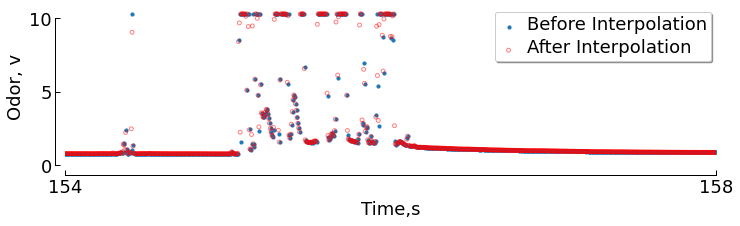

In [156]:
f,ax1=plt.subplots(1,1,figsize=(10,3))
ax1.scatter(df.time,df._analog_output_data, s=10, label='Before Interpolation')
ax1.scatter(odor.sync_time,odor.odor, facecolors='none', edgecolor='r', s=15,
            alpha=0.5, label='After Interpolation')
ax1.set_xlim(154,158)

ax1.set_xlabel('Time,s')
ax1.set_ylabel('Odor, v')
mpl_functions.adjust_spines(ax1,['left', 'bottom'],spine_locations={},
                            smart_bounds=True, yticks=[0,5,10], xticks=[154,158],linewidth=1)

ax1.legend(loc='upper right',fancybox=True, shadow=True)
f.tight_layout(pad=1)
figurefirst.mpl_functions.set_fontsize(f, 18)   
# f.savefig('../../Figure/Interpolation.jpeg', dpi=300, bbox_inches = "tight")

## Interpolation

### Getting the GPS and WindSensor Time

In [88]:
df["trisonica_time"] = df._trisonica_header_stamp_secs + (df._trisonica_header_stamp_nsecs*1e-9)
df["gps_time"] = df._ublox_gps_fix_header_stamp_secs+(df._ublox_gps_fix_header_stamp_nsecs*1e-9)
df["gps_vel_time"] = df._ublox_gps_fix_velocity_header_stamp_secs+(df._ublox_gps_fix_velocity_header_stamp_nsecs*1e-9)
df["imu_time"] = df._imu_data_header_stamp_secs +(df._imu_data_header_stamp_nsecs*1e-9)

### Separating ODOR, WIND, GPS in dataframes

In [89]:
df_odor = pd.DataFrame({'odor_time': df.master_time,
                        'odor': df._analog_output_data,})
df_wind = pd.DataFrame({'wind_time': df.trisonica_time,'trisonica_U': df._trisonica_westeast,
                        'trisonica_V': df._trisonica_northsouth,'trisonica_pressure': df._trisonica_pressure,
                       'trisonica_temperature': df._trisonica_temperature})
df_gps = pd.DataFrame({'gps_time': df.gps_time,'lat': df._ublox_gps_fix_latitude,
                       'lon': df._ublox_gps_fix_longitude})
df_gps_vel = pd.DataFrame({'gps_vel_time':df.gps_vel_time,
                        'gps_linear_x':df._ublox_gps_fix_velocity_twist_twist_linear_x,
                      'gps_linear_y':df._ublox_gps_fix_velocity_twist_twist_linear_y,
                      'gps_linear_z':df._ublox_gps_fix_velocity_twist_twist_linear_z})
df_imu = pd.DataFrame({'imu_time': df.imu_time,'imu_angular_x': df._imu_data_angular_velocity_x,
                     'imu_angular_y': df._imu_data_angular_velocity_y, 
                     'imu_angular_z':df._imu_data_angular_velocity_z,
                      'imu_linear_acc_x':df._imu_data_linear_acceleration_x,
                      'imu_linear_acc_y':df._imu_data_linear_acceleration_y,
                      'imu_linear_acc_z':df._imu_data_linear_acceleration_z})

#### Creating time column for odor by dropping NaNs

In [90]:
df_odor = df_odor[df_odor.odor.notna()]

### Combined time from three sensors and arrange based on time

In [91]:
dfn = pd.concat([df_odor, df_wind, df_gps, df_gps_vel, df_imu], sort=True)
combined_time = np.hstack([df_odor.odor_time, df.trisonica_time ,df.gps_time, df.gps_vel_time, df.imu_time])
dfn['time'] = combined_time
dfn = dfn.sort_values(by=['time'])

### Find Master Time 

In [92]:
dt_odor = np.median(np.diff(dfn.odor_time.dropna().values))
print('dt Odor: ', dt_odor)
dt_wind = np.median(np.diff(dfn.wind_time.dropna().values))
print('dt Wind: ', dt_wind)
dt_gps = np.median(np.diff(dfn.gps_time.dropna().values))
print('dt Gps: ', dt_gps)
dt_gps_vel = np.median(np.diff(dfn.gps_vel_time.dropna().values))
print('dt Gps Vel: ', dt_gps_vel)
dt_imu = np.median(np.diff(dfn.imu_time.dropna().values))
print('dt Imu: ', dt_imu)
first_time = np.max([dfn.odor_time.min(), dfn.wind_time.min(), dfn.gps_vel_time.min(),
                     dfn.gps_time.min(), dfn.imu_time.min()])
last_time = np.min([dfn.odor_time.max(), dfn.wind_time.max(), dfn.gps_time.max(),
                    dfn.gps_vel_time.max(),dfn.imu_time.max()])
# print(first_time,last_time)
master_time = np.arange(first_time, last_time, dt_odor)

dt Odor:  0.004995822906494141
dt Wind:  0.024992942810058594
dt Gps:  0.20000004768371582
dt Gps Vel:  0.20000004768371582
dt Imu:  0.003999948501586914


### Create Interpolation function

In [93]:
# create interpolation function and inteprolate sensor 1
df_odor_1= dfn[['odor_time', 'odor']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_odor_1.odor_time, df_odor_1.odor)
interp_odor = func_interp_sensor_1(master_time)

df_wind_1= dfn[['wind_time', 'trisonica_U']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_1.wind_time, df_wind_1.trisonica_U)
interp_wind_U = func_interp_sensor_1(master_time)

df_wind_2= dfn[['wind_time', 'trisonica_V']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_2.wind_time, df_wind_2.trisonica_V)
interp_wind_V = func_interp_sensor_1(master_time)

df_wind_3= dfn[['wind_time', 'trisonica_pressure']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_3.wind_time, df_wind_3.trisonica_pressure)
interp_wind_p = func_interp_sensor_1(master_time)

df_wind_4= dfn[['wind_time', 'trisonica_temperature']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_4.wind_time, df_wind_4.trisonica_temperature)
interp_wind_t = func_interp_sensor_1(master_time)


df_gps_lat= dfn[['gps_time', 'lat']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_lat.gps_time, df_gps_lat.lat)
interp_gps_lat = func_interp_sensor_1(master_time)

df_gps_lon= dfn[['gps_time', 'lon']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_lon.gps_time, df_gps_lon.lon)
interp_gps_lon = func_interp_sensor_1(master_time)

df_gps_x= dfn[['gps_vel_time', 'gps_linear_x']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_x.gps_vel_time, df_gps_x.gps_linear_x)
interp_gps_x = func_interp_sensor_1(master_time)

df_gps_y= dfn[['gps_vel_time', 'gps_linear_y']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_y.gps_vel_time, df_gps_y.gps_linear_y)
interp_gps_y = func_interp_sensor_1(master_time)

df_gps_z= dfn[['gps_vel_time', 'gps_linear_z']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_z.gps_vel_time, df_gps_z.gps_linear_z)
interp_gps_z = func_interp_sensor_1(master_time)


df_imu_x= dfn[['imu_time', 'imu_angular_x']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_x.imu_time, df_imu_x.imu_angular_x)
interp_imu_x = func_interp_sensor_1(master_time)

df_imu_y= dfn[['imu_time', 'imu_angular_y']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_y.imu_time, df_imu_y.imu_angular_y)
interp_imu_y = func_interp_sensor_1(master_time)


df_imu_z= dfn[['imu_time', 'imu_angular_z']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_z.imu_time, df_imu_z.imu_angular_z)
interp_imu_z = func_interp_sensor_1(master_time)


df_imu_linear_x= dfn[['imu_time', 'imu_linear_acc_x']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_linear_x.imu_time, df_imu_linear_x.imu_linear_acc_x)
interp_imu_linear_acc_x = func_interp_sensor_1(master_time)

df_imu_linear_y= dfn[['imu_time', 'imu_linear_acc_y']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_linear_y.imu_time, df_imu_linear_y.imu_linear_acc_y)
interp_imu_linear_acc_y = func_interp_sensor_1(master_time)


df_imu_linear_z= dfn[['imu_time', 'imu_linear_acc_z']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_linear_z.imu_time, df_imu_linear_z.imu_linear_acc_z)
interp_imu_linear_acc_z = func_interp_sensor_1(master_time)





### New Interpolated Dataframe

In [94]:
odor = pd.DataFrame({'master_time': master_time,
                        'odor': interp_odor,
                        'trisonica_U': interp_wind_U,
                        'trisonica_V': interp_wind_V,
                        'lat': interp_gps_lat,
                        'lon': interp_gps_lon,
                        'gps_linear_x':interp_gps_x,
                        'gps_linear_y':interp_gps_y,
                        'gps_linear_z':interp_gps_z,
                        'trisonica_pressure':interp_wind_p,
                        'trisonica_temperature':interp_wind_t,
                        'imu_angular_x': interp_imu_x,
                        'imu_angular_y': interp_imu_y,
                        'imu_angular_z': interp_imu_z,
                        'imu_linear_acc_x':interp_imu_linear_acc_x,
                        'imu_linear_acc_y':interp_imu_linear_acc_y,
                        'imu_linear_acc_z':interp_imu_linear_acc_z})

# odor.to_hdf('/home/ecc/data/DesertDataOct/Run01/Run01_Interpolated.h5',key='df', mode='w')
# odor.to_hdf('~/Documents/Myfiles/DataAnalysis/data/TrajectoryInt.h5',key='df', mode='w')


## Interpolating Wind and Odor

In [53]:
dir = '/home/gadfly/DataAnalysis/data/'

fname = (dir+'20201020_172919_windy_b_data.hdf')
wind_df=pd.read_hdf(fname)
# wind_df.keys()
wind_df.reset_index(inplace=True, drop=True) 
wind =pd.DataFrame()
wind = wind_df.loc[(wind_df.time_epoch >= odor.master_time.iloc[0]) & 
                   (wind_df.time_epoch <= odor.master_time.iloc[-1])]
# df2.to_hdf('/home/ecc/data/DesertDataOct/Run01/Wind01.h5', key='df2', mode='w')

### Converting lat lon information to meters

In [54]:
from shapely.geometry import Point
odor['geometry'] = odor.apply(lambda row: Point(row.lon, row.lat), axis=1)

geodf = gpd.GeoDataFrame(odor)
geodf.crs= {'init': 'epsg:4326'}
# change the projection of geodf
geodf = geodf.to_crs("+proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_def")

geodf["x"] = geodf.geometry.apply(lambda row:row.x)
geodf["y"] = geodf.geometry.apply(lambda row:row.y)

#source location to meters
source = (40.79376709443614, -119.15757512132207)
# source =(39.252441,-119.878037)
u =  utm.from_latlon(40.79376709443614, -119.15757512132207)
# u =  utm.from_latlon(39.252441, -119.878037)
xfromsrc= geodf.x-u[0]
geodf.insert(9,'xsrc',xfromsrc) 

yfromsrc = geodf.y-u[1]
geodf.insert(10,'ysrc', yfromsrc)

/home/gadfly/DataAnalysis/pyresearch/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/home/gadfly/DataAnalysis/pyresearch/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### Interpolate

In [56]:
df_odor_loc=pd.DataFrame({'odor_time': geodf.master_time,'xsrc': geodf.xsrc, 'ysrc':geodf.ysrc, 
                          'odor':geodf.odor, 'lat':geodf.lat, 'lon':geodf.lon,
                          'trisonica_U':geodf.trisonica_U, 'trisonica_V':geodf.trisonica_V,
                          'trisonica_temperature':geodf.trisonica_temperature,
                          'trisonica_pressure':geodf.trisonica_pressure,
                          'gps_linear_x':geodf.gps_linear_x,
                          'gps_linear_y':geodf.gps_linear_y,
                          'gps_linear_z':geodf.gps_linear_z,
                          'imu_angular_x': geodf.imu_angular_x,
                          'imu_angular_y': geodf.imu_angular_y,
                          'imu_angular_z': geodf.imu_angular_z,
                          'imu_linear_acc_x':geodf.imu_linear_acc_z,
                          'imu_linear_acc_y':geodf.imu_linear_acc_z,
                          'imu_linear_acc_z':geodf.imu_linear_acc_z
                         })
df_wind_loc=pd.DataFrame({'wind_time': wind.time_epoch,'U': wind.U,'V': wind.V, 'D':wind.D , 'S2':wind.S2})


df_new = pd.concat([df_odor_loc,df_wind_loc], sort=True)
combined_time = np.hstack([df_odor_loc.odor_time, df_wind_loc.wind_time])

df_new['time'] = combined_time
df_new=df_new.sort_values(by=['time'])

dt_odor = np.median(np.diff(df_new.odor_time.dropna().values))
print('dt Odor: ', dt_odor)
dt_wind = np.median(np.diff(df_new.wind_time.dropna().values))
print('dt Wind: ', dt_wind)

first_time = np.max([df_new.odor_time.min(), df_new.wind_time.min()])
last_time = np.min([df_new.odor_time.max(), df_new.wind_time.max()])
############## SELECT THE RESOLUTION HERE ####################
master_time = np.arange(first_time, last_time, dt_odor)

# create interpolation function and inteprolate sensor 1
df_odor_1= df_new[['odor_time', 'xsrc']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_odor_1.odor_time, df_odor_1.xsrc)
interp_odor_x = func_interp_sensor_1(master_time)

df_odor_2= df_new[['odor_time', 'ysrc']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_odor_2.odor_time, df_odor_2.ysrc)
interp_odor_y = func_interp_sensor_1(master_time)

df_odor_la= df_new[['odor_time', 'lat']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_odor_la.odor_time, df_odor_la.lat)
interp_odor_la = func_interp_sensor_1(master_time)

df_odor_lo= df_new[['odor_time', 'lon']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_odor_lo.odor_time, df_odor_lo.lon)
interp_odor_lo = func_interp_sensor_1(master_time)

df_odor_3= df_new[['odor_time', 'odor']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_odor_3.odor_time, df_odor_3.odor)
interp_odor = func_interp_sensor_1(master_time)

df_gps_x= df_new[['odor_time', 'gps_linear_x']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_x.odor_time, df_gps_x.gps_linear_x)
interp_gps_x = func_interp_sensor_1(master_time)

df_gps_y= df_new[['odor_time', 'gps_linear_y']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_y.odor_time, df_gps_y.gps_linear_y)
interp_gps_y = func_interp_sensor_1(master_time)

df_gps_z= df_new[['odor_time', 'gps_linear_z']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_gps_z.odor_time, df_gps_z.gps_linear_z)
interp_gps_z = func_interp_sensor_1(master_time)



df_wind_1x= df_new[['odor_time', 'trisonica_U']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_1x.odor_time, df_wind_1x.trisonica_U)
interp_wind_Ux = func_interp_sensor_1(master_time)

df_wind_2x= df_new[['odor_time', 'trisonica_V']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_2x.odor_time, df_wind_2x.trisonica_V)
interp_wind_Vx = func_interp_sensor_1(master_time)

df_wind_3x= df_new[['odor_time', 'trisonica_pressure']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_3x.odor_time, df_wind_3x.trisonica_pressure)
interp_wind_px = func_interp_sensor_1(master_time)

df_wind_4x= df_new[['odor_time', 'trisonica_temperature']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_4x.odor_time, df_wind_4x.trisonica_temperature)
interp_wind_tx = func_interp_sensor_1(master_time)

df_imu_x= df_new[['odor_time', 'imu_angular_x']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_x.odor_time, df_imu_x.imu_angular_x)
interp_imu_x = func_interp_sensor_1(master_time)

df_imu_y= df_new[['odor_time', 'imu_angular_y']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_y.odor_time, df_imu_y.imu_angular_y)
interp_imu_y = func_interp_sensor_1(master_time)


df_imu_z= df_new[['odor_time', 'imu_angular_z']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_z.odor_time, df_imu_z.imu_angular_z)
interp_imu_z = func_interp_sensor_1(master_time)


df_imu_linear_x= df_new[['odor_time', 'imu_linear_acc_x']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_linear_x.odor_time, df_imu_linear_x.imu_linear_acc_x)
interp_imu_linear_acc_x = func_interp_sensor_1(master_time)

df_imu_linear_y= df_new[['odor_time', 'imu_linear_acc_y']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_linear_y.odor_time, df_imu_linear_y.imu_linear_acc_y)
interp_imu_linear_acc_y = func_interp_sensor_1(master_time)


df_imu_linear_z= df_new[['odor_time', 'imu_linear_acc_z']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_imu_linear_z.odor_time, df_imu_linear_z.imu_linear_acc_z)
interp_imu_linear_acc_z = func_interp_sensor_1(master_time)




df_wind_1= df_new[['wind_time', 'U']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_1.wind_time, df_wind_1.U)
interp_wind_U = func_interp_sensor_1(master_time)

df_wind_2= df_new[['wind_time', 'V']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_2.wind_time, df_wind_2.V)
interp_wind_V = func_interp_sensor_1(master_time)

df_wind_3= df_new[['wind_time', 'D']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_3.wind_time, df_wind_3.D)
interp_wind_D = func_interp_sensor_1(master_time)

df_wind_4= df_new[['wind_time', 'S2']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_wind_4.wind_time, df_wind_4.S2)
interp_wind_S2 = func_interp_sensor_1(master_time)



windn = pd.DataFrame({'master_time': master_time,
                            'xsrc': interp_odor_x,
                            'ysrc': interp_odor_y,
                            'lat': interp_odor_la,
                            'lon': interp_odor_lo,  
                            'odor': interp_odor,
                            'trisonica_u': interp_wind_Ux,
                            'trisonica_v': interp_wind_Vx,
                            'trisonica_pressure':interp_wind_px,
                            'trisonica_temperature':interp_wind_tx,
                            'gps_linear_x': interp_gps_x,
                            'gps_linear_y': interp_gps_y,
                            'gps_linear_z': interp_gps_z,
                            'imu_angular_x': interp_imu_x,
                            'imu_angular_y': interp_imu_y,
                            'imu_angular_z': interp_imu_z,
                            'imu_linear_acc_x':interp_imu_linear_acc_x,
                            'imu_linear_acc_y':interp_imu_linear_acc_y,
                            'imu_linear_acc_z':interp_imu_linear_acc_z,
                      
                            'U': interp_wind_U,
                            'V': interp_wind_V,
                            'D':interp_wind_D,
                            'S2':interp_wind_S2})

# windn.to_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/Windy/Run04Run05HD.h5',key='windn',mode='w')
# windn.to_hdf('/home/ecc/data/DesertDataOct/Run0'+str(run)+'/Run0'+str(run)+'.h5',key='windn', mode='w')
# windn.to_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/Forest/ForestInterpolated.h5', key='windn', mode='w')

dt Odor:  0.004999637603759766
dt Wind:  0.10000276565551758


In [57]:
windn

,master_time,xsrc,ysrc,lat,lon,odor,trisonica_u,trisonica_v,trisonica_pressure,trisonica_temperature,...,imu_angular_x,imu_angular_y,imu_angular_z,imu_linear_acc_x,imu_linear_acc_y,imu_linear_acc_z,U,V,D,S2
0,1.603224e+09,45.660475,-32.826748,40.793482,-119.157025,0.762883,0.603015,0.917817,884.852190,11.322203,...,0.001685,0.002972,-0.004814,-9.911283,-9.911283,-9.911283,-1.320000,0.280000,102.000000,1.350000
1,1.603224e+09,45.660475,-32.826748,40.793482,-119.157025,0.764961,0.667430,0.937947,884.832053,11.255775,...,0.001977,0.002836,-0.003694,-9.911328,-9.911328,-9.911328,-1.311001,0.278500,102.000000,1.341001
2,1.603224e+09,45.660475,-32.826748,40.793482,-119.157025,0.765763,0.731721,0.956206,884.812159,11.190078,...,0.002303,0.002836,-0.001284,-9.906812,-9.906812,-9.906812,-1.302002,0.277000,102.000000,1.332002
3,1.603224e+09,45.660475,-32.826748,40.793482,-119.157025,0.764035,0.792081,0.915206,884.799988,11.147546,...,0.001491,0.002321,-0.003933,-9.901045,-9.901045,-9.901045,-1.293003,0.275500,102.000000,1.323003
4,1.603224e+09,45.660475,-32.826748,40.793482,-119.157025,0.764849,0.846244,0.780801,884.799988,11.141528,...,0.001487,0.001979,-0.004417,-9.896220,-9.896220,-9.896220,-1.284004,0.274001,102.000000,1.314004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59700,1.603225e+09,-17.751698,-5.651132,40.793712,-119.157784,0.703317,0.835121,1.630670,884.700012,10.900000,...,0.439887,0.048939,0.016607,-12.139608,-12.139608,-12.139608,-0.629899,-0.199504,72.524809,0.655543
59701,1.603225e+09,-17.756617,-5.653788,40.793712,-119.157784,0.702913,0.914098,1.660287,884.700012,10.900000,...,0.468449,0.052951,0.029420,-12.170962,-12.170962,-12.170962,-0.641398,-0.206503,72.174844,0.668041
59702,1.603225e+09,-17.761537,-5.656443,40.793712,-119.157784,0.701496,0.977683,1.683476,884.700012,10.896290,...,0.495810,0.060629,0.040101,-11.793890,-11.793890,-11.793890,-0.652897,-0.213502,71.824879,0.680540
59703,1.603225e+09,-17.766456,-5.659099,40.793712,-119.157784,0.702714,0.976784,1.679743,884.700012,10.877041,...,0.518685,0.074007,0.050196,-11.535380,-11.535380,-11.535380,-0.664396,-0.220502,71.474914,0.693039
